# Preprocessing with tensorflow pipelines

In [81]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
data = pd.read_csv('data/autos.csv', encoding='cp1252', index_col=None)

In [83]:
aux = data.loc[:,['price','brand']].groupby(['brand']).aggregate(['mean','count','max'])
aux

price                   
                         mean  count         max
brand                                           
alfa_romeo       35737.169723   2345    74185296
audi             15868.514221  32873    99999999
bmw              14844.144883  40274    99999999
chevrolet         7447.764228   1845      999999
chrysler          3916.025482   1452       37500
citroen           8880.624855   5182    27322222
dacia             5839.654444    900       19990
daewoo            1017.811808    542        4200
daihatsu          1693.656328    806       12850
fiat              5326.312836   9676    12345678
ford              8462.054706  25573    99999999
honda             3804.630113   2836       48500
hyundai           5415.057049   3646       35999
jaguar           14228.083736    621      466000
jeep             12009.677819    807      999999
kia               5656.574168   2555       43900
lada              3037.444444    225       12390
lancia            3165.754132    484       64000
land_rover       16707.559740    770      120000
mazda             5680.361194   5695    10000000
mercedes_benz    17244.060438  35309    99999999
mini              9846.432233   3394       45000
mitsubishi        3273.896766   3061      130000
nissan            4527.510820   5037       99999
opel              3223.522449  40136    12345678
peugeot           3166.981591  11027       31500
porsche          51089.857336   2215     9999999
renault           2334.258946  17969      110000
rover             1508.022449    490       28900
saab              3820.041509    530       29900
seat              4356.666050   7022      154651
skoda             6411.183478   5641      145000
smart             3531.562012   5249      100000
sonstige_autos  615647.624309   3982  2147483647
subaru            4248.948652    779       38333
suzuki            4371.683419   2328     1000000
toyota            5232.657009   4694      160000
trabant          20415.935702    591    11111111
volkswagen       14533.496007  79640    99999999
volvo             8774.005110   3327    12345678

In [84]:
data = data.loc[(data.brand.isin(['ford','opel','volkswagen','peugeot','renault'])) & (data.price < 60000) & (data.price > 0),]
data = data.loc[(data.yearOfRegistration >= 1970) & (data.yearOfRegistration <= 2017)]
data = data.loc[:,['price','yearOfRegistration','model','kilometer','powerPS','abtest', 'fuelType', 'vehicleType', 'gearbox']]
data = data.dropna()

data.shape

(134576, 9)

In [85]:
train, test = train_test_split(data, test_size=0.3, random_state=666)
train, val = train_test_split(train, test_size=0.2, random_state=666)

train = train.reset_index(drop=True)
val = val.reset_index(drop=True)
test = test.reset_index(drop=True)

# save data
train.to_csv('data/train.csv', sep=',', index=False)
val.to_csv('data/val.csv', sep=',', index=False)
test.to_csv('data/test.csv', sep=',', index=False)

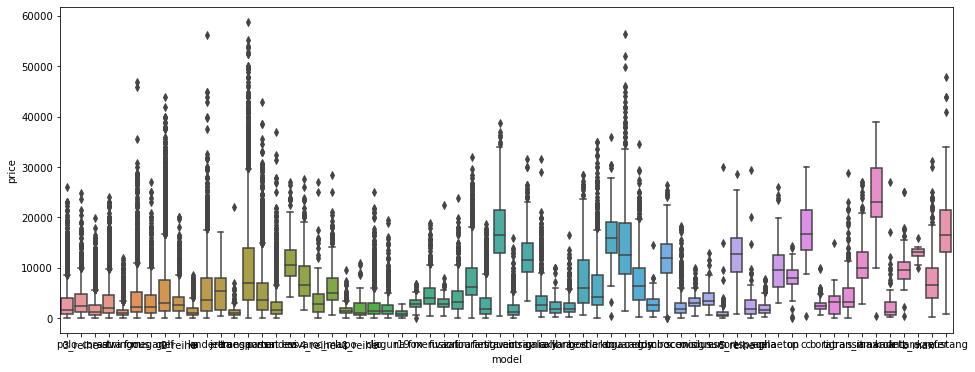

In [86]:
plt.figure(figsize=(16,6))
sns.boxplot(x='model', y='price', data=train)
plt.show()

In [87]:
# # fill NAs

# ## model, vehicleType, fuelType NAs with "NA"
# train.model = train.model.fillna('_NA')
# train.vehicleType = train.vehicleType.fillna('_NA')
# train.fuelType = train.fuelType.fillna('_NA')

# ## fill notRepairedDamage NAs with 'nein'
# train.notRepairedDamage = train.notRepairedDamage.fillna('nein')

# ## fill gearbox NAs with most frequent gearbox for model-brand
# gearbox_na = train.copy()\
#     .loc[train.gearbox.isna() != True,['gearbox','model','brand']]\
#     .groupby(['model','brand'], as_index=False)\
#     .agg(lambda x:x.value_counts().index[0])
# ## fill powerps NAs with mean power for model-brand
# powerPS_na = train.copy()\
#     .loc[train.powerPS > 0,['powerPS','model','brand']]\
#     .groupby(['model','brand'], as_index=False)\
#     .mean()

# gearbox_powerps_na = pd.merge(gearbox_na, powerPS_na, on=['model','brand'], how='outer')

# ## Save na_encoding
# gearbox_powerps_na.to_csv('data/gearbox_powerps_na.csv', sep=',', index=False)

# train = pd.merge(train, gearbox_powerps_na, on=['model','brand'], suffixes = ('','_na'), how='left')

# train.loc[train.gearbox.isna(),'gearbox'] = train.loc[train.gearbox.isna(),'gearbox_na']
# train.loc[train.powerPS.isna(),'powerPS'] = train.loc[train.powerPS.isna(),'powerPS_na']

# ## case when for a model-brand there is no info of any gearbox
# train.loc[train.gearbox.isna(),'gearbox'] = train.gearbox.mode().values

# ## case when for a model-brand there is no info of any powerPS
# train.loc[train.powerPS.isna(),'powerPS'] = train.powerPS.mean()

# train = train.drop(['gearbox_na', 'powerPS_na'], axis=1)

In [88]:
# check NA
train.isna().sum()

price                 0
yearOfRegistration    0
model                 0
kilometer             0
powerPS               0
abtest                0
fuelType              0
vehicleType           0
gearbox               0
dtype: int64

In [89]:
# # Clustering categorical features
# ## Brand
# brand_price_train = train.copy().loc[:,['brand','price']]
# brand_price_train = brand_price_train.groupby(['brand']).mean()

# brand_clustering = KMeans(n_clusters=8, random_state=666)
# brand_clustering.fit(np.expand_dims(brand_price_train.price.values, axis=1))
# brands_clustered = brand_clustering.predict(np.expand_dims(brand_price_train.price.values, axis=1))

# brand_clusters = pd.DataFrame({'brand': brand_price_train.index.values, 'cluster_brand': brands_clustered, 'mean_price': brand_price_train.loc[:,'price']}).reset_index(drop=True)

# sns.catplot(x='cluster_brand', y='mean_price', kind="box", data=brand_clusters)
# plt.show()

# ###########
# brand_clusters.loc[:,['cluster_brand', 'brand']].to_csv('data/brand_clusters.csv', sep=',', index=False)
# ###########


# ## Model
# model_price_train = train.copy().loc[:,['model','price']]
# model_price_train = model_price_train.groupby(['model']).mean()

# model_clustering = KMeans(n_clusters=6, random_state=666)
# model_clustering.fit(np.expand_dims(model_price_train.price.values, axis=1))
# models_clustered = model_clustering.predict(np.expand_dims(model_price_train.price.values, axis=1))

# model_clusters = pd.DataFrame({'model': model_price_train.index.values, 'cluster_model': models_clustered, 'mean_price': model_price_train.loc[:,'price']}).reset_index(drop=True)

# sns.catplot(x='cluster_model', y='mean_price', kind="box", data=model_clusters)
# plt.show()

# ###########
# model_clusters.loc[:,['cluster_model', 'model']].to_csv('data/model_clusters.csv', sep=',', index=False)
# ###########


# ## Postal code
# postalcode_price_train = train.copy().loc[:,['postalCode','price']]
# postalcode_price_train = postalcode_price_train.groupby(['postalCode']).mean()

# postalcode_clustering = KMeans(n_clusters=9, random_state=666)
# postalcode_clustering.fit(np.expand_dims(postalcode_price_train.price.values, axis=1))
# postalcode_clustered = postalcode_clustering.predict(np.expand_dims(postalcode_price_train.price.values, axis=1))

# postalcode_clusters = pd.DataFrame({'postalCode': postalcode_price_train.index.values, 'cluster_pcode': postalcode_clustered, 'mean_price': postalcode_price_train.loc[:,'price']}).reset_index(drop=True)


# sns.catplot(x='cluster_pcode', y='mean_price', kind="box", data=postalcode_clusters)
# plt.show()

# ###########
# postalcode_clusters.loc[:,['cluster_pcode', 'postalCode']].to_csv('data/postalcode_clusters.csv', sep=',', index=False)
# ###########

In [90]:
# Normalize numerical features
numerical_features = ['yearOfRegistration', 'powerPS', 'kilometer']

train.yearOfRegistration = 2017 - train.yearOfRegistration

numerical_features_normalization = pd.DataFrame({
    'feature': numerical_features,
    'mean': [np.mean(train[x]) for x in numerical_features],
    'std': [np.std(train[x]) for x in numerical_features]
})

numerical_features_normalization

# save normalization parameters
numerical_features_normalization.to_csv('data/numerical_features_normalization.csv', sep=",", index=False)